# IEDA3302 Group 10 Final Project (Spring, 2022) 

# 1. Background and project target (Iris)


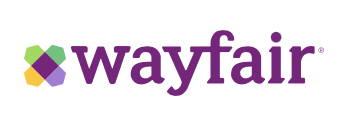

<b>We choose 'Wayfair' to analyze, it is an American e-commerce company founded in 2002 that sells furniture and home goods. It offers 14 million items from more than 11,000 global suppliers.<br>
We first get the internal factors of the company which may have affect the overall performance and then combine them with the external factors to build our model and find the best features (for instance advertisments). <br>
As most e-commerce companies’ customers and active users who would constantly do web searches and get onto social networking sites such as Google and Facebook to share information. Therefore, we also study the market trends by analysing 'google trend data' and use them to compare and give more suggestions on the previous findings generated by the internal and external factors. </b>

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model, metrics, feature_extraction
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
import time
from itertools import combinations
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# 2. Data Processing (Iris)
For this part, we will input all the datasets we obtained and do the cleansing and adjustment to make all the datasets tidy and usable for later analysis.

These datasets include :<br>
[1] Wayfair's quarterly report. Which are given by Wayfair and are meant to be the internal factors that affect Wayfair. <br>
[2] The US indicators. They were used for stabilizing the prediction. We obtained them online and they are meant to be the external factors that affect Wayfair.

## 2.1 Wayfair internal data
Firstly, we input the Wayfair internal data, and fix this dataset.

### 2.1.1 Data input
We have downloaded the data to be csv, which is from https://www.businessofapps.com/data/wayfair-statistics/. 

In [2]:
# Set display options
pd.options.display.max_rows, pd.options.display.max_columns = 30, 50

# Importing data from csv
wayfair_quarterly_data = pd.read_csv('Wayfair_quarterly_report.csv')
wayfair_quarterly_data.dtypes
# Load Wayfair quarterly data

DATE            object
REVENUE          int64
US               int64
WORLD            int64
ADVERTISING      int64
ACTIVE USER    float64
dtype: object

In [3]:
#Display the dataset
wayfair_quarterly_data

,DATE,REVENUE,US,WORLD,ADVERTISING,ACTIVE USER
0,1/1/2014,279,279,0,44,NaN
1,4/1/2014,295,295,0,43,NaN
2,7/1/2014,336,336,0,50,NaN
3,10/1/2014,409,409,0,55,NaN
4,1/1/2015,424,424,0,58,NaN
...,...,...,...,...,...,...
27,10/1/2020,3671,2999,672,374,31.2
28,1/1/2021,3478,2821,657,366,33.2
29,4/1/2021,3858,3098,760,352,31.1
30,7/1/2021,3121,2595,526,315,29.2


The dataset is a 32* 6 table, including 5 features, including revenue, revenue in US, revenue in rest of the world, advertising cost, active user.  

Since there are NaN data in the wayfair_quarterly_data. We try to use substitute something to the empty data.

## 2.1.2 Mean Substitution Approach
Firstly, we use the mean of the features to substitue the NaN data for and plot the data. 

In [4]:
#Calculate the mean for the NaN data
errorframe = wayfair_quarterly_data
ACTIVE_USER_col = errorframe['ACTIVE USER']
errorframe[['ACTIVE USER']] = errorframe[['ACTIVE USER']].fillna(errorframe[['ACTIVE USER']].mean())
errorframe

,DATE,REVENUE,US,WORLD,ADVERTISING,ACTIVE USER
0,1/1/2014,279,279,0,44,19.745
1,4/1/2014,295,295,0,43,19.745
2,7/1/2014,336,336,0,50,19.745
3,10/1/2014,409,409,0,55,19.745
4,1/1/2015,424,424,0,58,19.745
...,...,...,...,...,...,...
27,10/1/2020,3671,2999,672,374,31.200
28,1/1/2021,3478,2821,657,366,33.200
29,4/1/2021,3858,3098,760,352,31.100
30,7/1/2021,3121,2595,526,315,29.200


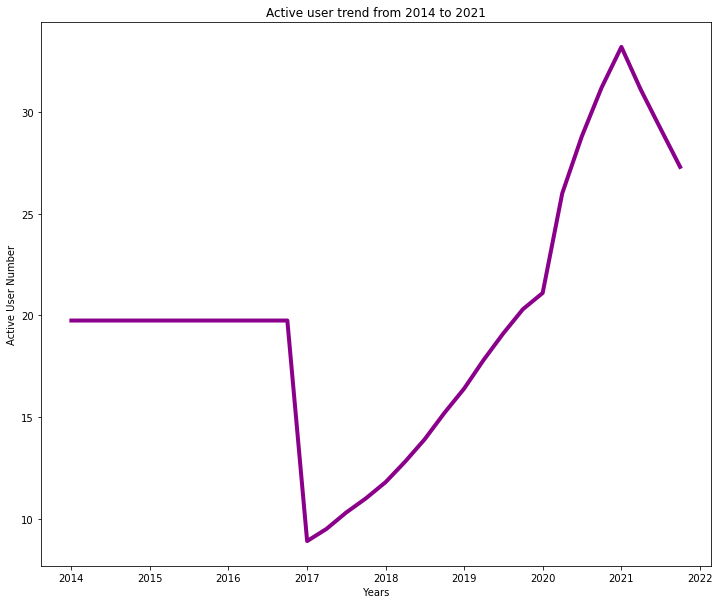

In [5]:
# Visualizating the method

d = pd.to_datetime(errorframe.DATE)
x = np.array(d, ndmin=2).T
y = np.array(errorframe[['ACTIVE USER']])

# plotting
plt.figure(figsize=(12,10))
plt.title("Active user trend from 2014 to 2021")
plt.xlabel(" Years ")
plt.ylabel("Active User Number")
plt.plot(x, y, color ='darkmagenta',linewidth=4)
plt.show()

From the graph above we can see it turns out the approach is not a good since the active user should increase by time.
So we think of another approach.

## 2.1.3 LinearRegression Approach
Secondly, we use linear regression to predict the NaN data and plot the result.

In [6]:
# Reload the dataframe
wayfair_quarterly_data = pd.read_csv('Wayfair_quarterly_report.csv')
wayfair_quarterly_data

,DATE,REVENUE,US,WORLD,ADVERTISING,ACTIVE USER
0,1/1/2014,279,279,0,44,NaN
1,4/1/2014,295,295,0,43,NaN
2,7/1/2014,336,336,0,50,NaN
3,10/1/2014,409,409,0,55,NaN
4,1/1/2015,424,424,0,58,NaN
...,...,...,...,...,...,...
27,10/1/2020,3671,2999,672,374,31.2
28,1/1/2021,3478,2821,657,366,33.2
29,4/1/2021,3858,3098,760,352,31.1
30,7/1/2021,3121,2595,526,315,29.2


In [7]:
# Test number of NaN
wayfair_quarterly_data[['ACTIVE USER']].isnull().sum()

ACTIVE USER    12
dtype: int64

In [8]:
# Make a new dataframe for work
df = wayfair_quarterly_data
df = df.drop(columns = ['DATE'])

In [9]:
# Get only the NaN Active user for the test data
test_data_user = df[df['ACTIVE USER'].isnull()]

In [10]:
# Remove NaN for the train data
df.dropna(inplace= True)

In [11]:
x_train_user = df.drop('ACTIVE USER',axis = 1)
# x_train_user (without active user)

In [12]:
y_train_user = df['ACTIVE USER']
# y_train_user (only active user)

In [13]:
# Import Linear regression model from Sklearn
# Build regression model for active user
LR = LinearRegression()
LR.fit(x_train_user,y_train_user)

LinearRegression()

In [14]:
x_test_user = test_data_user[['REVENUE','US','WORLD','ADVERTISING']]

In [15]:
y_pred_user = LR.predict(x_test_user)#Prediction
y_pred_user = np.around(y_pred_user, decimals=1)#round up
y_pred_user

array([3.8, 3.8, 3.9, 3.8, 3.9, 3.8, 3.8, 3.9, 5.9, 6.1, 6.9, 8.1])

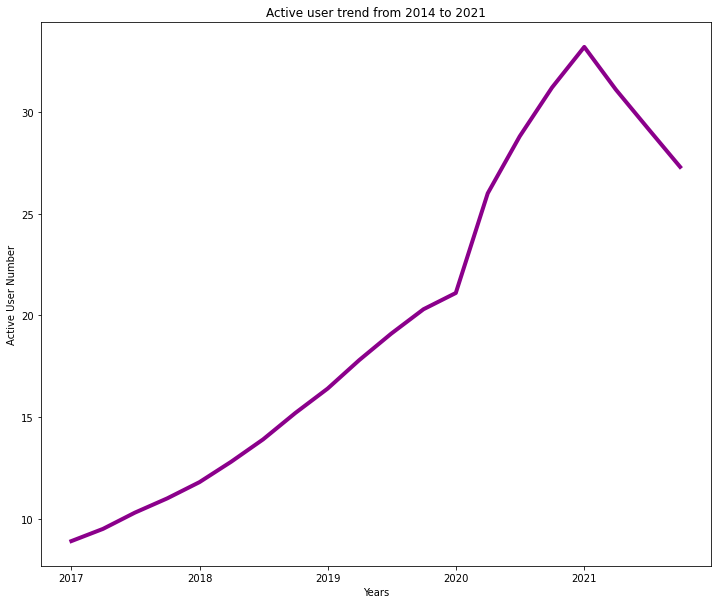

In [16]:
# Vistualize how the data of active user improved by comparing the mean method and linear regression method

plt.figure(figsize=(12,10))
# data to be plotted
d = pd.to_datetime(wayfair_quarterly_data.DATE)
x = np.array(d, ndmin= 2).T
y = wayfair_quarterly_data[['ACTIVE USER']]
y = np.array(y, ndmin =2)
 
# plotting
plt.title("Active user trend from 2014 to 2021")
plt.xlabel("Years")
plt.ylabel("Active User Number")
plt.plot(x, y, color= 'darkmagenta',linewidth=4)
plt.show()

As shown above, finally, we get a reasonable data for active user.

## 2.1.4 Substitute back
Finally, we will replace the NaN data with the predicted data from previous part

In [17]:
# NaN are difficult to manipulate so we want to substitute something unique for future use
wayfair_quarterly_data[['ACTIVE USER']] = wayfair_quarterly_data[['ACTIVE USER']].fillna('change')
# The word "change" does not appear other part
wayfair_quarterly_data

,DATE,REVENUE,US,WORLD,ADVERTISING,ACTIVE USER
0,1/1/2014,279,279,0,44,change
1,4/1/2014,295,295,0,43,change
2,7/1/2014,336,336,0,50,change
3,10/1/2014,409,409,0,55,change
4,1/1/2015,424,424,0,58,change
...,...,...,...,...,...,...
27,10/1/2020,3671,2999,672,374,31.2
28,1/1/2021,3478,2821,657,366,33.2
29,4/1/2021,3858,3098,760,352,31.1
30,7/1/2021,3121,2595,526,315,29.2


In [18]:
# Create an array for replacing the "change" part
arr = wayfair_quarterly_data.to_numpy()

In [19]:
for i in range(12):
    if arr[i][5] == "change": # [5] to fix the active user
           arr[i][5] = y_pred_user[i]  #replace

In [20]:
# Substitute back
wayfair_quarterly_data = pd.DataFrame(arr,columns = ['DATE','REVENUE','US','WORLD','ADVERTISING','ACTIVE USER'])
wayfair_quarterly_data 

,DATE,REVENUE,US,WORLD,ADVERTISING,ACTIVE USER
0,1/1/2014,279,279,0,44,3.8
1,4/1/2014,295,295,0,43,3.8
2,7/1/2014,336,336,0,50,3.9
3,10/1/2014,409,409,0,55,3.8
4,1/1/2015,424,424,0,58,3.9
...,...,...,...,...,...,...
27,10/1/2020,3671,2999,672,374,31.2
28,1/1/2021,3478,2821,657,366,33.2
29,4/1/2021,3858,3098,760,352,31.1
30,7/1/2021,3121,2595,526,315,29.2


Now, the Wayfair internal factor dataset is ready for use.

## 2.2 Wayfair External indicators 
Then, we input the wayfair external indicators. <br/>
The data are downloaded to csv from below links and combined together.

Home_ownership:https://fred.stlouisfed.org/series/RHORUSQ156N  <br/>
E_commerce_retail:https://fred.stlouisfed.org/series/ECOMSA  <br/>
E_commerce_retail_percent:https://fred.stlouisfed.org/series/ECOMPCTSA <br/>
Unemployment: https://fred.stlouisfed.org/series/UNRATE <br/>
Furniture_retail: https://www.statista.com/statistics/523473/furniture-retail-sales-value-quarterly-index-in-great-britain/ <br/>
Interest rate: https://fred.stlouisfed.org/series/INTDSRUSM193N <br/>

In [21]:
# Importing data from csv
external_indicators = pd.read_csv('external_indicators.csv') #read the external factors
external_indicators

,Date,PCE,Home_ownership,GDP,GDP_INDEX,GDP_real_INDEX,E_commerce_retail,E_commerce_retail_percent,Unemployment,Furniture_retail,Interest_rate
0,1/1/2014,1.6,64.8,4203940,103.106,100.394,70305,6.2,6.6,24173,0.07
1,4/1/2014,1.9,64.7,4360754,103.865,103.218,73329,6.3,6.2,25082,0.09
2,7/1/2014,1.9,64.4,4454942,104.000,105.507,75729,6.5,6.2,25339,0.09
3,10/1/2014,1.1,64.0,4531052,103.678,107.568,77649,6.6,5.7,25800,0.09
4,1/1/2015,-0.5,63.7,4389973,104.093,103.668,80228,6.9,5.7,25948,0.11
...,...,...,...,...,...,...,...,...,...,...,...
28,1/1/2021,1.5,65.6,5367754,115.920,113.974,215290,13.6,6.3,35983,0.09
29,4/1/2021,3.8,65.4,5711844,117.939,119.164,221951,13.3,6.1,36930,0.07
30,7/1/2021,6.5,65.4,5822816,119.400,120.122,214932,13.0,5.4,36411,0.10
31,10/1/2021,5.3,65.5,6121436,121.070,124.645,218533,12.9,4.6,36516,0.08


For external indicators, we have 10 features, including PCE, Home_ownership, GDP, GPD index, GDP real index, E-Commerce retail sales, E-Commerce retail sales percentage, unemployment rate, furniture retail sales and interest rate.

## 2.3 Data Combination and Adjustment¶
After getting the datasets, we combine data and correct data types. Also, we delete some data are not helpful.

In [22]:
# Combine and delete some data we feel unsituable
data_combine_i_e = wayfair_quarterly_data.merge(external_indicators, left_on='DATE', right_on='Date')
data_combine_i_e_copy =data_combine_i_e

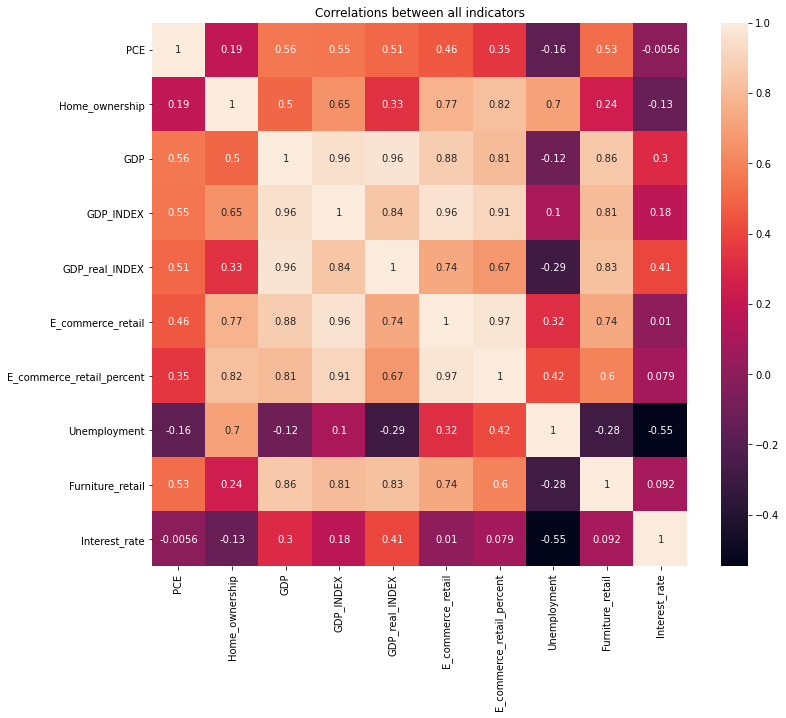

In [23]:
# Visualize the correlation of GDP 
plt.figure(figsize=(12,10))
plt.title("Correlations between all indicators")
corr = data_combine_i_e_copy.corr()
#corr =data_combine_i_e.corr()
sns.heatmap(corr,  annot= True);

We can see from the plot that GDP, GDP_INDEX, GDP_real_INDEX are highly correlated (0.96).<br>
Also, we observe that E_commerce_retial and E_commerce_retail_percent are highly correlated (0.97).

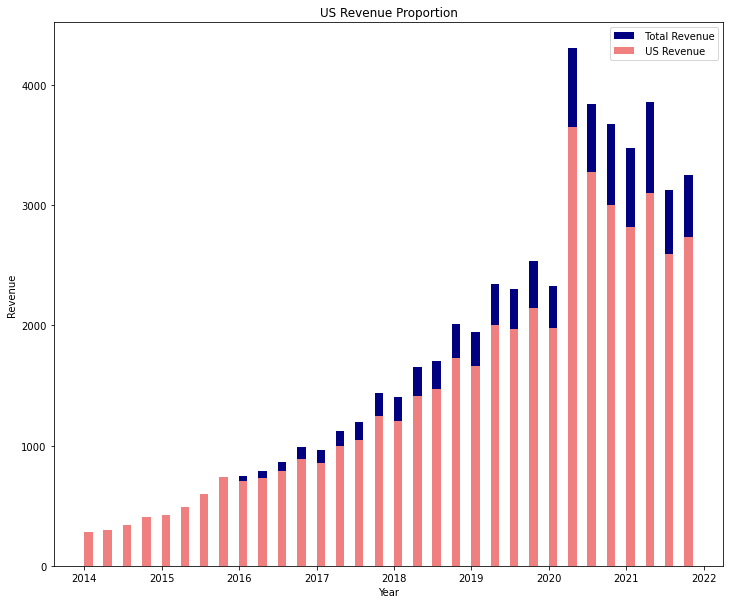

In [24]:
# Visualize the US Revenue when compare to the total revenue
plt.figure(figsize=(12,10))
Total_revenue = list(data_combine_i_e_copy.REVENUE)
US_revenue = list(data_combine_i_e_copy.US)

d = pd.to_datetime(data_combine_i_e_copy.Date)
x = d

#print(Total_revenue)
#print(US_revenue)
plt.title("US Revenue Proportion")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.bar(x,Total_revenue, color ='navy',label=' Total Revenue',width=40,align='edge')
plt.bar(x,US_revenue, color ='lightcoral',label=' US Revenue',width=40,align='edge')
plt.legend()


As shown above, the US revenue cover most of the total revenue. 

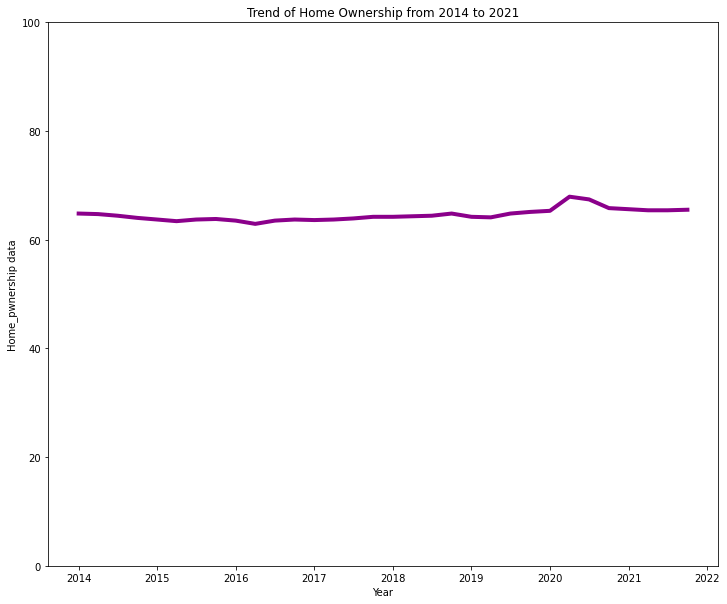

In [25]:
#Visualize the trend of the Home_ownership
plt.figure(figsize=(12,10))
d = pd.to_datetime(data_combine_i_e_copy.Date)
x = d
y = data_combine_i_e_copy[['Home_ownership']]

# plotting
plt.title("Trend of Home Ownership from 2014 to 2021")
plt.xlabel("Year")
plt.ylabel("Home_pwnership data")
plt.ylim(0, 100)
plt.plot(x,y, color ='darkmagenta',linewidth=4)
plt.show()  

Over the years, the home ownership's trend is relatively stable with little fluctuation.

In [26]:
#We make a new dataset by deleting the unwanted columns

data_combine_i_e = data_combine_i_e.reindex(columns= ['DATE','REVENUE','ACTIVE USER','ADVERTISING', 
                                                      'Furniture_retail','GDP_real_INDEX', 'E_commerce_retail_percent', 
                                                      'Unemployment','Interest_rate'])
# Since we use array to do data combine, the datatypes and no longer the same, so we change it back
convert_dict = {'REVENUE': np.int64,
                'ADVERTISING': float,
                'ACTIVE USER' :float
                } 
data_combine_i_e = data_combine_i_e.astype(convert_dict)
data_combine_i_e,data_combine_i_e.dtypes


(         DATE  REVENUE  ACTIVE USER  ADVERTISING  Furniture_retail  \
 0    1/1/2014      279          3.8         44.0             24173   
 1    4/1/2014      295          3.8         43.0             25082   
 2    7/1/2014      336          3.9         50.0             25339   
 3   10/1/2014      409          3.8         55.0             25800   
 4    1/1/2015      424          3.9         58.0             25948   
 ..        ...      ...          ...          ...               ...   
 27  10/1/2020     3671         31.2        374.0             32190   
 28   1/1/2021     3478         33.2        366.0             35983   
 29   4/1/2021     3858         31.1        352.0             36930   
 30   7/1/2021     3121         29.2        315.0             36411   
 31  10/1/2021     3252         27.3        345.0             36516   
 
     GDP_real_INDEX  E_commerce_retail_percent  Unemployment  Interest_rate  
 0          100.394                        6.2           6.6        

In [27]:
# Make another dataframe that does not include date for future use
data_all = data_combine_i_e.reindex(columns=['REVENUE','ACTIVE USER','ADVERTISING','E_commerce_retail_percent', 'Furniture_retail','GDP_real_INDEX' ,'Unemployment', 'Interest_rate'])
#print(data_all.dtypes)
#data_all

Reasons for deleting data:
1. GDP,GDP_INDEX because GDP, GDP_INDEX, GDP_real_INDEX are highly correlated, having GDP_real_INDEX is enough
2. Delete 'E_commerce_retail' because they are highly correlated.
3. Delete Home_ownership because it is overly stable which do not change a not making it a unsuitble indicator
4. Delete US beacaue it dominant the model considering it is over 85% to 100% of the revenue
5. Delete World because it has no income in the 8 data points would affect a lot.


## 3. General Performance - Market (Cynthia)
In this part we compare their current performance by comparing to the Furniture retial market.<br/>
"1" means they are doing well compare the market, "0" means does not.


In [28]:
temp = (data_all['REVENUE']/data_all['Furniture_retail']).apply(np.log)
revenue_diff = []
revenue_log = []
for i in range(len(temp)-1):
    if (temp.values[i+1] - temp.values[i] >= 0): 
        iflag = True
    else:
        iflag = False
    revenue_log = np.append(revenue_log, iflag)
    revenue_diff = np.append(revenue_diff, temp.values[i+1] - temp.values[i])
revenue_log 

#add visualization

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.])

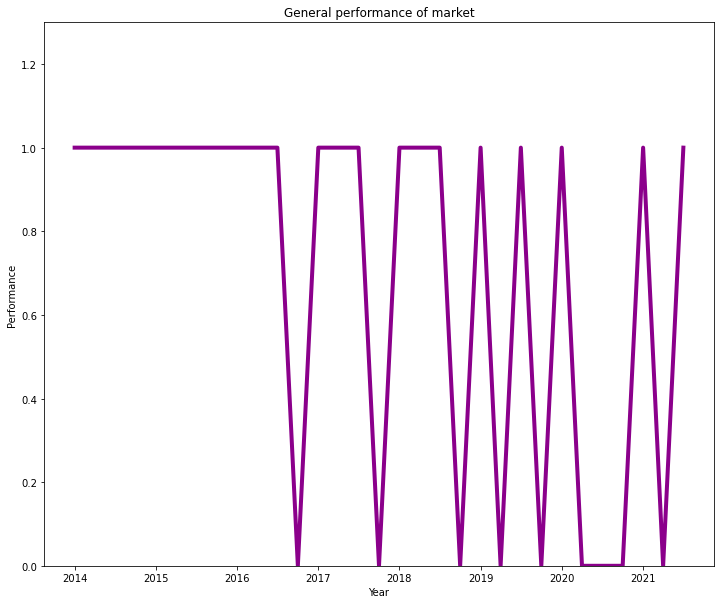

In [29]:
#Visualize the general performance of market
plt.figure(figsize=(12,10))
# data to be plotted
d = pd.to_datetime(wayfair_quarterly_data.DATE)
x = np.array(d, ndmin= 2).T 
x =x[:31]
y = np.array(y, ndmin =1)
y = revenue_log 

# plotting
plt.title("General performance of market")
plt.xlabel("Year")
plt.ylabel("Performance")#1 indicate good 
plt.ylim(0, 1.3)
plt.plot(x,y, color ='darkmagenta',linewidth=4)
plt.show()  

We can found that Wayfair's revenue was higher than the market at the first half of data. But there are unsatisfying performing in the current year.

# 4. Regression (Dedrick)

We set "Revenue" as target feature, and then split the data into train and test set.  <br/>
Then we use linear regression to do the prediction.

In [30]:
# Write down the list of features
features = ['PCE', 'GDP_real_INDEX',
         'E_commerce_retail_percent', 'Unemployment',
         'Furniture_retail', 'Interest_rate']

In [31]:
# Write down the target
target = ['revenue']

In [32]:
data_train = data_all.loc[0:29, :]
#print(data_train)
data_test = data_all.loc[30:, :]
#print(data_test)
X_train = data_train.drop('REVENUE', axis = 1)
X_test = data_test.drop('REVENUE', axis = 1)
Y_train = data_train['REVENUE']
Y_test = data_test['REVENUE']
#print(X_train)
#print(X_test)
#print(Y_train)
#print(Y_test)

In [33]:
# Import Linear regression model from Sklearn
multi_model = linear_model.LinearRegression()

In [34]:
# Train the model by using the first 30 quarters
X0 = X_train.values
Y0 = Y_train.values
X0, Y0 = shuffle(X0, Y0)
multi_model.fit(X0, Y0)

LinearRegression()

In [35]:
# Get values of the intercept and coefficients for the model
multi_model.intercept_, multi_model.coef_

(-5019.624382270519,
 array([1.23952829e+01, 4.47425441e+00, 1.12972516e+02, 4.32241888e-02,
        2.38867950e+01, 1.27243786e+02, 3.52736929e+01]))

In [36]:
# Compare the predicted value of the training set after we train the model
multi_model.predict(X0), Y0

(array([1974.35689845,  803.89279316, 2188.08146422, 1595.45739008,
        3859.35514757,  580.87296534, 1112.5072036 , 1761.34694352,
         717.76352492, 4294.6309087 , 1041.92093703, 3675.01818372,
        1414.63594876, 1254.35190782, 1998.30319121,  500.81503101,
         273.37989958,  707.79540408,  974.77682556, 1476.82084485,
        2396.28191349,  394.78153987, 3648.52238373,  394.31920226,
         432.28334044, 2250.94655994,  879.38703227,  210.00184593,
        2580.68025353, 3664.71251537]),
 array([2014,  787, 2343, 1655, 3840,  594, 1123, 1706,  747, 4305,  985,
        3671, 1404, 1198, 1945,  492,  295,  740,  961, 1439, 2305,  424,
        3478,  336,  409, 2330,  862,  279, 2533, 3858]))

In [37]:
multi_model.score(X0,Y0)

0.9966683188711534

In [38]:
# Now use the last two quarters for test
X1 = X_test.values
Y1 = Y_test.values
X1, Y1

(array([[2.92000e+01, 3.15000e+02, 1.30000e+01, 3.64110e+04, 1.20122e+02,
         5.40000e+00, 1.00000e-01],
        [2.73000e+01, 3.45000e+02, 1.29000e+01, 3.65160e+04, 1.24645e+02,
         4.60000e+00, 8.00000e-02]]),
 array([3121, 3252]))

In [39]:
# Make prediction for the test set and compare third quarter and fourth quarter
multi_model.predict(X1), Y1

(array([3354.16006657, 3463.6174213 ]), array([3121, 3252]))

We found that the actual performance is worse than predicted values.

# 5. Best features - What affect most (Dedrick)
We use all_subset to select features;<br/>
Seperate numerical and categorical features to reorder the dataset columns;<br/>
Use greedy algorithm to find the best features.

In [40]:
def all_subsets(my_list):
    subs = []
    for i in range(1, 4):
        subs += combinations(my_list, i)
    subset_List = []
    for i in subs:
            subset_List += [list(i)]
    return subset_List

In [41]:
def onehot_encoder(df, feature):
    result = pd.DataFrame()
    if feature in df.columns:
        
        result = pd.get_dummies(df, columns=[feature])
        return result
    else:
        return print("Please select a feature in this df!")

In [42]:
# Seperate numerical and Categorial
features_numerical = list(data_all.select_dtypes(['int64', 'float64']).columns)
features_numerical.remove('REVENUE')
#print(features_numerical)
features_categorical = list(data_all.select_dtypes(['object']).columns)
#print(features_categorical)
features = features_categorical + features_numerical
target = ['REVENUE']
data = data_all[features_numerical + features_categorical + target]
#data

In [43]:
#use all_subsets to select the features
features_sub = all_subsets(features)

In [44]:
len(features_sub)

63

In [45]:
#split data to train and test 
train_valid, test = train_test_split(data, test_size = 0.2, random_state = 20220303)
train_valid = train_valid.reset_index(drop = True)
test = test.reset_index(drop = True)

In [46]:
train_valid

,ACTIVE USER,ADVERTISING,E_commerce_retail_percent,Furniture_retail,GDP_real_INDEX,Unemployment,Interest_rate,REVENUE
0,3.9,50.0,6.5,25339,105.507,6.2,0.09,336
1,17.8,259.0,10.5,30218,116.903,3.6,2.42,2343
2,33.2,366.0,13.6,35983,113.974,6.3,0.09,3478
3,8.9,118.0,8.4,28573,106.801,4.7,0.65,961
4,8.1,116.0,8.2,28046,111.605,4.9,0.40,985
5,31.1,352.0,13.3,36930,119.164,6.1,0.07,3858
6,3.9,58.0,6.9,25948,103.668,5.7,0.11,424
7,20.3,311.0,11.0,30329,120.607,3.6,1.83,2533
8,21.1,276.0,11.4,29156,113.588,3.6,1.55,2330
9,3.8,43.0,6.3,25082,103.218,6.2,0.09,295


In [47]:
def kfold_cv(data, target, n):

    MSE = np.array([]) 

    kf = KFold(n_splits = n, random_state=0, shuffle = True)
    
    for train_index, validation_index in kf.split(data):

        train, valid = data.loc[train_index,:], data.loc[validation_index,:]

        X_train = train.drop(target, axis = 1)
        Y_train = train[target]        
        X_valid = valid.drop(target, axis = 1)
        Y_valid = valid[target]

        model = linear_model.LinearRegression()

        model.fit(X_train,Y_train)

        Y_valid_fit = model.predict(X_valid)
   
        MSE_temp = mean_squared_error(Y_valid_fit, Y_valid)
     
        MSE = np.append(MSE, MSE_temp)
        
    return MSE.mean()

In [48]:
def greedy_algo(features, features_categorical):
    greedy_select = []
    MSE_greedy_algo = np.array([])

    for i in range(len(features)):
        MSE = np.array([])
        features_left = list(set(features) - set(greedy_select))
        
        for new in features_left:
            features_new = greedy_select + [new]
            train_valid_sub = train_valid[features_new + target]

            categorical_sub = list(set(features_new) & set(features_categorical))

            if len(categorical_sub) != 0:
                for i in categorical_sub:
                    train_valid_sub = onehot_encoder(train_valid_sub, i)   

            MSE_sub = kfold_cv(train_valid_sub, 'REVENUE', 5)
            MSE = np.append(MSE, MSE_sub)
            
        greedy_select += [features_left[MSE.argmin()]]
        MSE_greedy_algo = np.append(MSE_greedy_algo, MSE.min()) 

    features_greedy = greedy_select[:(MSE_greedy_algo.argmin()+1)]
    return features_greedy

In [ ]:
features_greedy_list = []
for i in range(len(features_sub)):
    features_greedy = greedy_algo(features_sub[i], features_categorical)
    features_greedy_list.append(features_greedy)

In [ ]:
#features_greedy_list
MSE_list = np.array([])
RSE_list = np.array([])
for i in range(len(features_greedy_list)):
    data_greedy = data[features_greedy_list[i] + target]
    categorical_cv = list(set(features_greedy_list[i]) & set(features_categorical))
    if len(categorical_cv) != 0:
        for i in categorical_cv:
            data_greedy = onehot_encoder(data_greedy, i)
    train_valid_greedy_sub, test_greedy_sub = train_test_split(data_greedy, test_size = 0.2, random_state = 0)   
    model_greedy = linear_model.LinearRegression()

    X_greedy = train_valid_greedy_sub.drop(target, axis = 1)
    Y_greedy = train_valid_greedy_sub[target]

    model_greedy.fit(X_greedy, Y_greedy)

    Y_train_greedy_fit = model_greedy.predict(X_greedy)
    
    MSE_list = np.append(MSE_list, mean_squared_error(Y_greedy, Y_train_greedy_fit))
    RSE_list = np.append(RSE_list, np.sqrt(mean_squared_error(Y_greedy, Y_train_greedy_fit)))

In [ ]:
MSE_list

In [ ]:
RSE_list

In [ ]:
MSE_list.argmin(), RSE_list.argmin()
# Which is pretty low

In [ ]:
best_features = features_greedy_list[MSE_list.argmin()]
best_features

In [ ]:
X = data_all['ADVERTISING'].values.reshape(-1,1)
y = data_all['REVENUE'].values

#Train 
model = multi_model.fit(X, y)
response = model.predict(X)

#Evaluate

In [ ]:
r2 = model.score(X, y)

# Plot 
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Revenue', fontsize=14)
ax.set_xlabel('Advertising cost', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

'Advertising', 'Unemployment',  'Furniture_retail' are the best features
<br/> We believe it is because the other feature are more important, hence we do not consider the active user.
<br/>Advertising is the only thing the company can change.

# 6. Google Trend  (Cynthia)
To find the trendy products in Wayfair and add more advertisment on them, we find the key words from google trend, and use regression to find what key words is or are the most match with Wayfair's performance. 

## 6.1 Data Input
Firstly, we download data from google trend and convert them into quarterly data, then combine all key words. 

In [ ]:
def getdata(csv):
    
    #Save the name of key words from name of csv file
    name = csv[0:-4]
    #print(name)
    
    #Read the csv
    df = pd.read_csv(csv)
    #df = df.rename(columns={'Category: All categories': name})
    
    #Delete problematic row
    if 'Month' in df.index:
        df.drop(index = 'Month', inplace=True)
    
    #Change data type of searching number to integer    
    df = df.astype('int')

    #Transform index to datatime with format 'YYY-MM-DD'
    #index = df.index
    df = df.reset_index()
    df.columns = ['Date', name]
    df.Date = pd.to_datetime(df.Date)
    df.set_index('Date', inplace=True)
    
    #Convert monthly data to quarterly data
    df = df.resample('QS').sum()
    
    return df 

In [ ]:
# Get all dataframes
# Google trend search word
df1 = getdata('Furniture.csv') #Refer to Wayfair Furniture
df2 = getdata('Wayfair_US.csv') 
df3 = getdata('Kitchen.csv')#Refer to Wayfair Kitchen
df4 = getdata('Wayfair bedding.csv')
df5 = getdata('Wayfair indoor furniture.csv')
df6 = getdata('Wayfair lighting.csv')
df7 = getdata('Wayfair outdoor furniture.csv')
df8 = getdata('Wayfair pillow.csv')
df9 = getdata('Wayfair rugs.csv')
df10 = getdata('Wayfair_World.csv')


In [ ]:
# Make a list for all dataframes
dfs=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
nan_value = 0

# Combine them together
data = pd.concat(dfs, join='outer', axis=1).fillna(nan_value)
#data.drop(df.columns = [])
#data = data.loc[:,~data.columns.duplicated()].copy()
data.reset_index(inplace=True)
data

## 6.2 LogisticRegression
We use logistic regression to predict the data. <br/>
Then we calculate the score of the regression model for different key words.

In [ ]:
# Get the logistic regression model from Sklearn
logisticReg = linear_model.LogisticRegression()

In [ ]:
#adjust the data type
data_combine_i_e.DATE.astype('datetime64[ns]')
data.Date.astype('datetime64[ns]')

In [ ]:
#combine datasets and drop the useless row
data_combine_all = pd.concat([data_combine_i_e, data],axis=1)
data_combine_all= data_combine_all.drop([32])
data_combine_all

In [ ]:
# Logistic Regression
temp_0 = data_combine_all['Wayfair_World']
temp_1 = data_combine_all['Wayfair_US']
temp_2 = data_combine_all['Furniture']
temp_3 = data_combine_all['Kitchen']
temp_4 = data_combine_all['Wayfair bedding']
temp_5 = data_combine_all['Wayfair indoor furniture']
temp_6 = data_combine_all['Wayfair lighting']
temp_7 = data_combine_all['Wayfair outdoor furniture']
temp_8 = data_combine_all['Wayfair pillow']
temp_9 = data_combine_all['Wayfair rugs']

trend_log_0 = []
trend_log_1 = []
trend_log_2 = []
trend_log_3 = []
trend_log_4 = []
trend_log_5 = []
trend_log_6 = []
trend_log_7 = []
trend_log_8 = []
trend_log_9 = []

for i in range(len(temp_0)-1):
    trend_log_0 = np.append(trend_log_0, temp_0.values[i+1] - temp_0.values[i])
    trend_log_1 = np.append(trend_log_1, temp_1.values[i+1] - temp_1.values[i])
    trend_log_2 = np.append(trend_log_2, temp_2.values[i+1] - temp_2.values[i])
    trend_log_3 = np.append(trend_log_3, temp_3.values[i+1] - temp_3.values[i])
    trend_log_4 = np.append(trend_log_4, temp_4.values[i+1] - temp_4.values[i])
    trend_log_5 = np.append(trend_log_5, temp_5.values[i+1] - temp_5.values[i])
    trend_log_6 = np.append(trend_log_6, temp_6.values[i+1] - temp_6.values[i])
    trend_log_7 = np.append(trend_log_7, temp_7.values[i+1] - temp_7.values[i])
    trend_log_8 = np.append(trend_log_8, temp_8.values[i+1] - temp_8.values[i])
    trend_log_9 = np.append(trend_log_9, temp_9.values[i+1] - temp_9.values[i])


In [ ]:
all_trend = [trend_log_0,trend_log_1,trend_log_2,trend_log_3,trend_log_4,trend_log_5,trend_log_6,trend_log_7,trend_log_8,trend_log_9]

for i in range(len(all_trend)):
    trend = all_trend[i]
    logisticReg.fit(trend.reshape(-1,1), revenue_log)
    score = logisticReg.score(trend.reshape(-1,1), revenue_log)
    print("For trend_log_", i,", the score is ",score,".")

We can see from the printed results that trend_log_2 (Furniture) and trend_log_7 (Wayfair_outdoor furniture) have the highest score.

## 6.3 Accuracy
We use logistic regression to predict the furniture and out door furniture have the highest score and then we plot its ROC curve to show the accuracy.

In [ ]:
X = logisticReg.predict(trend_log_2.reshape(-1,1))
Y = revenue_log

In [ ]:
fpr, tpr, thresholds = roc_curve(Y, logisticReg.predict_proba(trend_log_2.reshape(-1,1))[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(dpi=100)
plt.title('ROC Curve of Furniture ')
plt.plot(fpr, tpr, 'b', label='ROC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(Y, logisticReg.predict_proba(trend_log_7.reshape(-1,1))[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(dpi=100)
plt.title('ROC Curve of Outdoor Furniture')
plt.plot(fpr, tpr, 'b', label='ROC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

After testing with the ROC curve, we confirmed that furniture and outdoor furniture are the best performanced features because their score is lagre than 0.5.

# 7. Conclusions (Cynthia)

<b>According to our modeling and analysis of the Wayfair internal and external data, we made some conclusions on Wayfair’s performance. <br><br>
Firstly, Wayfair’s revenue performance has been decreasing in the furniture market in recent years, which can be concluded by the performance from 2014 to 2019. Since most e-commerce businesses have an increasing sales volume during covid, which is from 2020 but Wayfair performed in another trend, we think they can apply advanced strategies to improve their performance.  <br><br>
Secondly, from regression modeling, we found that the 'ADVERTISING', 'Unemployment', 'Furniture_retail' are the best features. This means that the cost of advertising is one of the best features to predict revenue. So we suggest that Wayfair should put more effort into advertising. Also, unemployment is another best features, the reason for this may be that the employment rate decreased a lot during covid, where Wayfair also has a decreasing revenue. <br><br>
Thirdly, as we know web search has a critical influence on e-commerce business, we have done an analysis of google trend data and found that some of the keywords have a high correlation with Wayfair’s revenue. So we would suggest that Wayfair put more emphasis on improving its exposure online to gain more customers and make more promotions on the furniture, which is with highest score from our analysis. </b>